In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math


In [59]:
day = pd.read_csv('/Users/da_learner_m1_19/Downloads/das223/Regression/day.csv')
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [60]:
day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [61]:
day.shape

(730, 16)

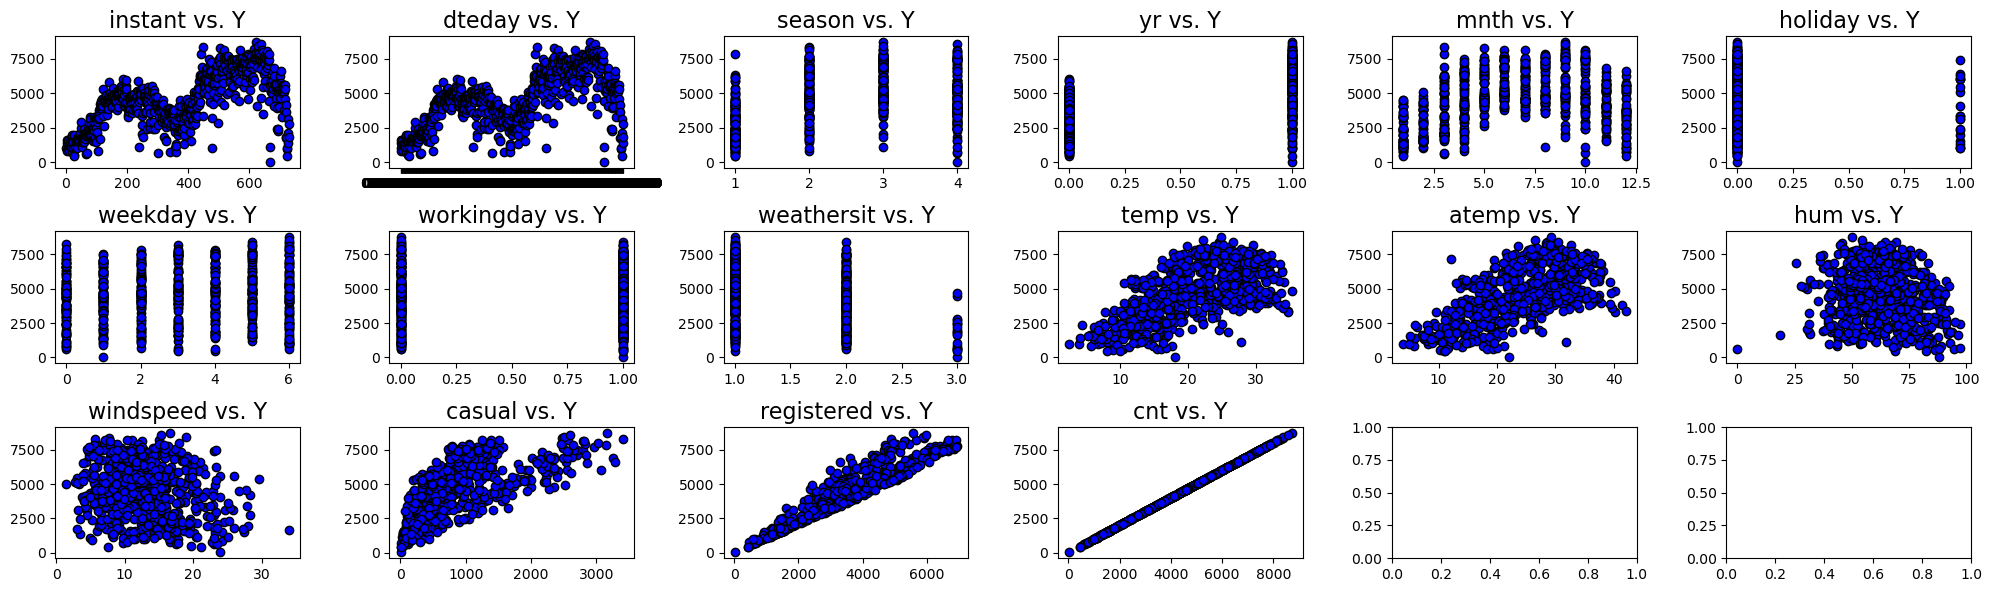

In [62]:
fig, axs = plt.subplots(3,6, figsize=(20,6),)
fig.subplots_adjust(hspace = 0.5, wspace=.2)
axs = axs.ravel()

for index, column in enumerate(day.columns):
    axs[index].set_title("{} vs. Y".format(column),fontsize=16)
    axs[index].scatter(x=day[column],y=day['cnt'],color='blue',edgecolor='k')
    
fig.tight_layout(pad=1)

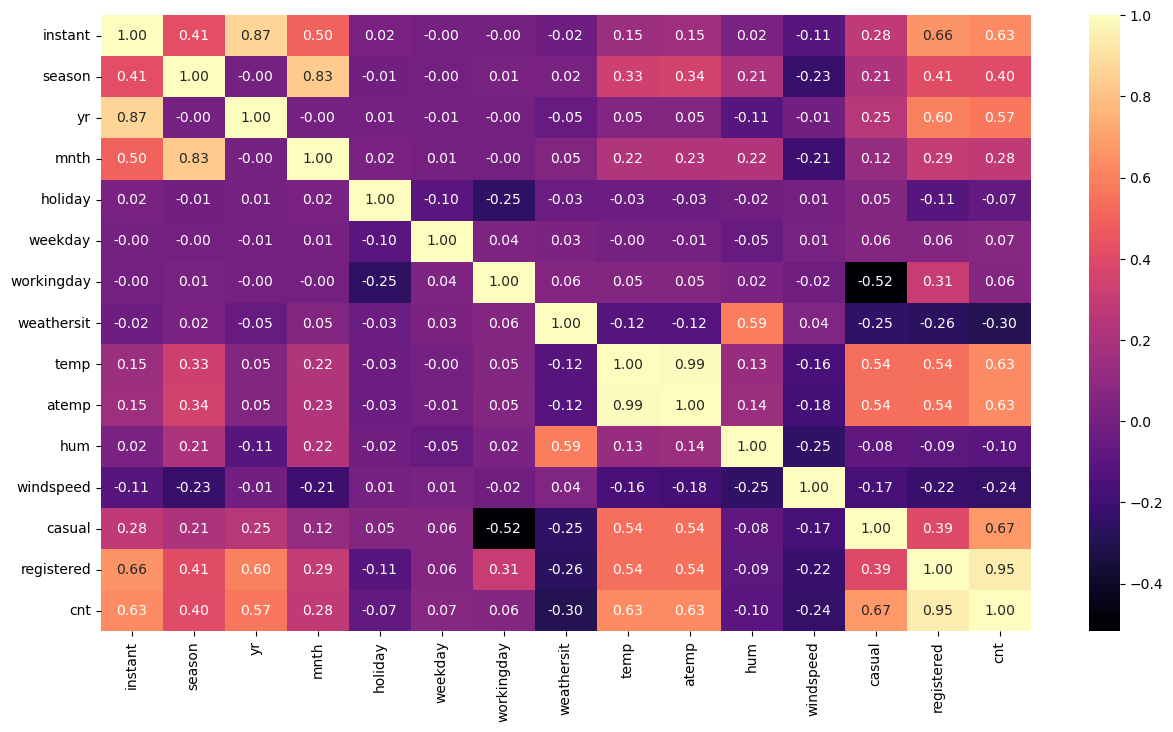

In [63]:

# import modules
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sb
  
# import file with dat  
# plotting correlation heatmap
plt.figure(figsize=(15,8))
dataplot=sb.heatmap(day.corr(),annot=True,fmt='.2f',cmap='magma')
  
# displaying heatmap
mp.show()

In [64]:
from sklearn.preprocessing import StandardScaler

object = StandardScaler()

my_day = day.drop(columns=['instant',	'dteday', 'atemp',		
	'casual',	'registered'])
my_day
my_day['temp']

# scale = object.fit_transform(my_day)
# scale = pd.DataFrame(data=scale,columns=['season','yr','mnth','holiday','weekday','workingday','weathersit','temp','hum','windspeed','cnt'])
# scale
# my_day['temp'] = np.log(my_day['temp'])


0      14.110847
1      14.902598
2       8.050924
3       8.200000
4       9.305237
         ...    
725    10.420847
726    10.386653
727    10.386653
728    10.489153
729     8.849153
Name: temp, Length: 730, dtype: float64

In [65]:
X = my_day.drop(['cnt'], axis=1)
y = my_day['cnt']


In [66]:
y

0       985
1       801
2      1349
3      1562
4      1600
       ... 
725    2114
726    3095
727    1341
728    1796
729    2729
Name: cnt, Length: 730, dtype: int64

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *

In [68]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size= 0.2,random_state=49)

In [69]:
y_train

637    6889
383    3292
614    7504
19     1927
214    3574
       ... 
182    5119
501    7384
424    4990
685    5629
426    4066
Name: cnt, Length: 584, dtype: int64

In [70]:
y_test

24     1985
222    4792
246    4940
84     2496
545    5687
       ... 
220    4602
159    3915
85     1693
644    3510
534    6825
Name: cnt, Length: 146, dtype: int64

In [71]:
lm = LinearRegression()


In [72]:
lm.fit(X_train,y_train)

LinearRegression()

In [73]:
y_pred_train = lm.predict(X_train)

In [74]:
mse_train = mean_squared_error(y_train,y_pred_train)
r2_train=r2_score(y_train,y_pred_train)

In [75]:
print((mse_train))
print(r2_train)

738300.021567541
0.8023729929994874


In [76]:
y_pred_test = lm.predict(X_test)

In [77]:
mse = mean_squared_error(y_test,y_pred_test)
r2=r2_score(y_test,y_pred_test)

In [78]:
print((mse))
print(r2)

823111.0528738198
0.7817676358089276


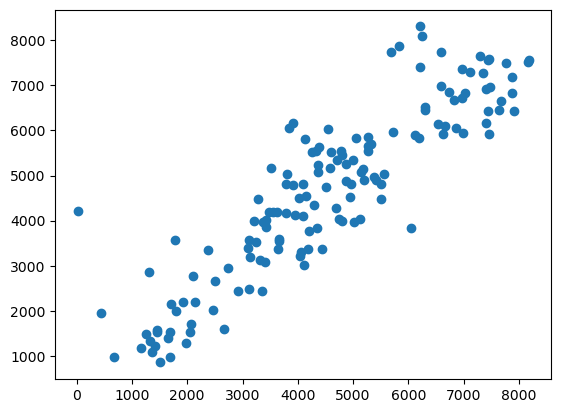

In [79]:
plt.scatter(y_test, y_pred_test)

